In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings; warnings.simplefilter('ignore')

### Описание данных

Для исследования был использован [датасет Mortality and Water Hardness](https://www.kaggle.com/ukveteran/mortality-and-water-hardness).

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

### Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Загрузка данных

In [2]:
water_data = pd.read_csv('water.csv')

In [3]:
water_data.drop(columns = 'Unnamed: 0', inplace=True)

In [4]:
water_data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


Построение точечного графика

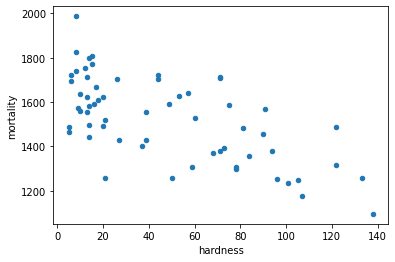

In [5]:
water_data.plot(kind='scatter', x='hardness', y='mortality');

Рассчет коэффициента корреляции Пирсона

In [6]:
water_data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Рассчет коэффициента корреляции Спирмена

In [7]:
water_data[['mortality', 'hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Построение модели линейной регрессии

In [8]:
X = water_data[['hardness']]
y = water_data['mortality']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'y = {round(model.coef_[0],2)}*X + {round(model.intercept_,2)}')

y = -3.13*X + 1668.97


In [11]:
y_pred = model.predict(X_test)

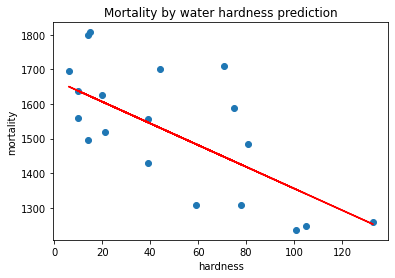

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Mortality by water hardness prediction');

Рассчет коэффициента детерминации

In [13]:
model.score(X_test, y_test)

0.5046490611017092

Вывод графика остатков

In [14]:
X_const = sm.add_constant(X_train)

In [15]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           7.83e-06
Time:                        20:58:26   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

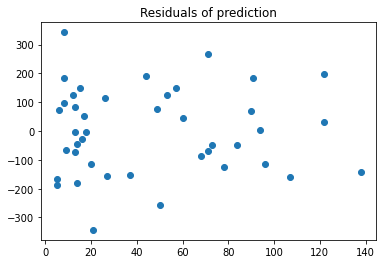

In [16]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Residuals of prediction');

### Вывод

Между смертностью и жесткостью воды есть небольшая отрицательная взаимосвязь (чем жестче вода, тем меньше смертей). По графикам разброс значений достаточно высокий и линейная регрессия не дает высокой точности предсказаний. Связь может быть косвенная. Может свойства воды связаны с тем, что она лучше. А там где лучше вода, там и могли быть лучше коммуникации и в целом инфраструктура района. Что так же могло показывать высокий уровень жизни и соответственно более низкую смертность.

### Задание. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделение датасета по районам

In [17]:
water_south = water_data[water_data.location == 'South']
water_north = water_data[water_data.location == 'North']

Построение точечного графика

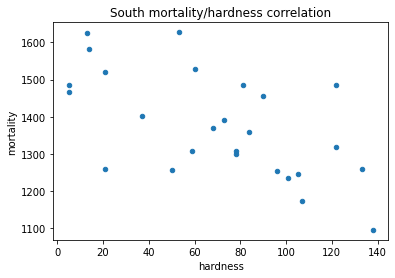

In [18]:
water_south.plot(kind='scatter', x='hardness', y='mortality')
plt.title('South mortality/hardness correlation');

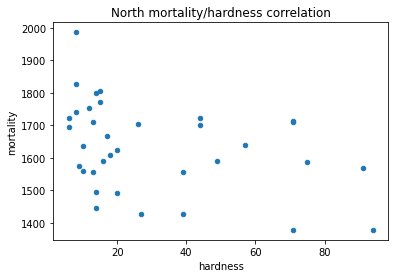

In [19]:
water_north.plot(kind='scatter', x='hardness', y='mortality')
plt.title('North mortality/hardness correlation');

Рассчет коэффициента корреляции Пирсона

Для юга:

In [20]:
water_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


Для севера

In [21]:
water_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


Рассчет коэффициента корреляции Спирмена

Для юга:

In [22]:
water_south[['mortality', 'hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Для севера

In [23]:
water_north[['mortality', 'hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Построение модели линейной регрессии

Для юга

In [24]:
X = water_south[['hardness']]
y = water_south['mortality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'y = {round(model.coef_[0],2)}*X + {round(model.intercept_,2)}')

y = -3.51*X + 1640.22


In [27]:
y_pred = model.predict(X_test)

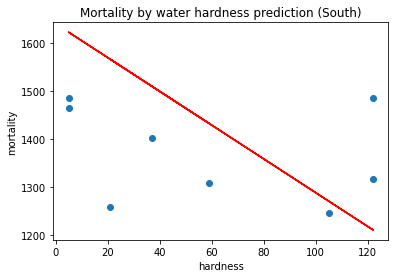

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Mortality by water hardness prediction (South)');

Рассчет коэффициента детерминации

In [29]:
model.score(X_test, y_test)

-2.5519223012352077

Вывод графика остатков

In [31]:
X_const = sm.add_constant(X_train)

In [34]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           7.30e-05
Time:                        20:59:21   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

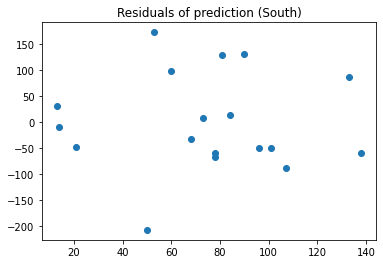

In [35]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Residuals of prediction (South)');

Для севера

In [36]:
X = water_north[['hardness']]
y = water_north['mortality']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'y = {round(model.coef_[0],2)}*X + {round(model.intercept_,2)}')

y = -1.98*X + 1688.15


In [39]:
y_pred = model.predict(X_test)

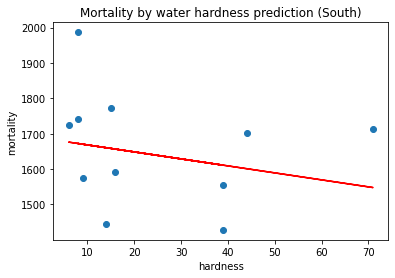

In [40]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.xlabel('hardness')
plt.ylabel('mortality')
plt.title('Mortality by water hardness prediction (South)');

Рассчет коэффициента детерминации

In [41]:
model.score(X_test, y_test)

0.018885304285745863

Вывод графика остатков

In [42]:
X_const = sm.add_constant(X_train)

In [43]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Thu, 10 Jun 2021   Prob (F-statistic):             0.0316
Time:                        21:00:10   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

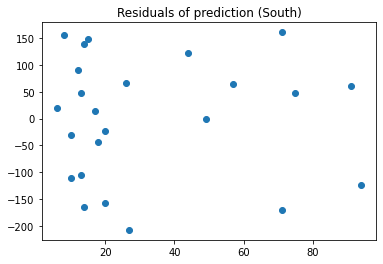

In [44]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)
plt.title('Residuals of prediction (South)');

### Вывод

Для южного региона корреляция состояния воды со смертностью выше, чем для северного. Для северного региона взаимосвязь больше выглядит нелинейной.